# Análise final sobre áudios

In [38]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa.display
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
import spacy
nlp = spacy.load('pt')
import nltk
nltk.download('stopwords')
nltk.download('rslp')

# exibe os plots no notebook
%matplotlib inline 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\lenno\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


### Obtendo informações do áudio com `ffprobe`

In [39]:
!ffprobe -i 'audios/AUDIO2.mp3' -print_format 'json' -show_streams 

ffprobe version git-2020-02-11-f15007a Copyright (c) 2007-2020 the FFmpeg developers
  built with gcc 9.2.1 (GCC) 20200122
  configuration: --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libmfx --enable-ffnvcodec --enable-cuvid --enable-d3d11va --enable-nvenc --enable-nvdec --enable-dxva2 --enable-avisynth --enable-libopenmpt --enable-amf
  libavutil      56. 39.100

### Exibindo o `comprimento da matriz de áudio` e a `taxa de amostragem`

In [40]:
x2, sample_rate2 = librosa.load('audios/AUDIO2.mp3')
print(x2.shape)
print(sample_rate2)

(1109115,)
22050


### Exibe o sinal para verificação

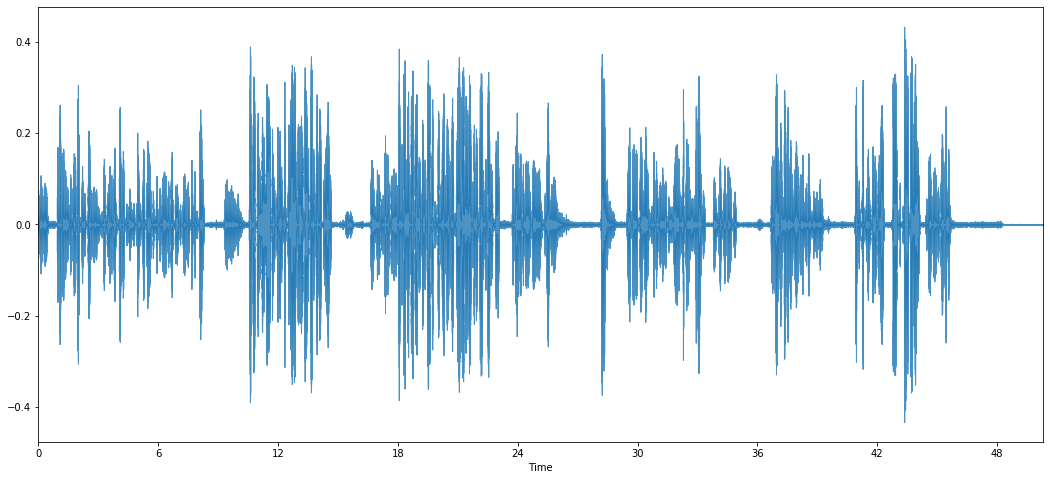

In [41]:
plt.figure(figsize=(18, 8))
librosa.display.waveplot(x2, sr=sample_rate2, alpha=0.8)
plt.show()

### Calcula a energia e exibe o resultado

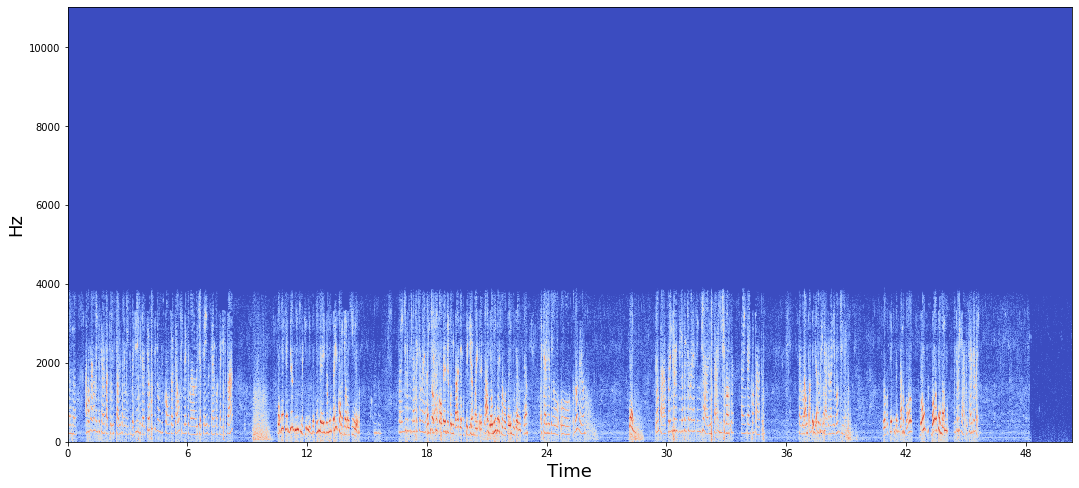

In [42]:
plt.figure(figsize=(18, 8))

X2 = librosa.stft(x2)
Xdb2 = librosa.amplitude_to_db(X2)
Xdb2 = librosa.amplitude_to_db(np.abs(X2))
librosa.display.specshow(Xdb2, sr=sample_rate2, x_axis='time', y_axis='hz')

plt.xlabel('Time', fontsize = 18), plt.ylabel('Hz', fontsize = 18)
plt.show()

### Analisando palavras do audio

In [43]:
stop_words = nltk.corpus.stopwords.words('portuguese')
stop_words = stop_words + ['']

In [44]:
def lemmatizer(text):
    sent = []
    doc = nlp(text)
    for word in doc:
        if word.pos_ == "VERB":
            sent.append(word.lemma_)
        else:
            sent.append(word.orth_)
    return " ".join(sent)

In [45]:
audio = open("./audios/audio02.txt", "r", encoding='utf-8')
audio_text = audio.read()

In [46]:
audio_transform = [text.lower() for text in audio_text.split(' ')]

In [47]:
audio_transform = [text for text in audio_transform if not text in stop_words]

In [48]:
audio_transform = [lemmatizer(text) for text in audio_transform]

In [49]:
from unidecode import unidecode
audio_transform = [unidecode(text) for text in audio_transform]

In [50]:
from collections import Counter
c = Counter(audio_transform)

In [51]:
most_commons_words = c.most_common()
most_commons_words

[('conseguir', 3),
 ('semana', 2),
 ('frente', 2),
 ('ligacao', 2),
 ('qualquer', 1),
 ('momento', 1),
 ('estar', 1),
 ('exatamente', 1),
 ('divida', 1),
 ('desconto', 1),
 ('fim', 1),
 ('dia', 1),
 ('sempre', 1),
 ('sera', 1),
 ('la .', 1),
 ('lindbergh', 1),
 ('china .', 1),
 ('mentalidade', 1),
 ('saber', 1),
 ('alguem', 1),
 ('amo', 1),
 ('serie', 1),
 ('verao .', 1),
 ('tava', 1),
 ('juros', 1),
 ('s', 1),
 ('diario', 1),
 ('gente', 1),
 ('volta', 1),
 ('entrar', 1),
 ('contato .', 1),
 ('casal', 1),
 ('pago', 1),
 ('maria', 1),
 ('van', 1),
 ('ter .', 1),
 ('interligar', 1),
 ('seara', 1),
 ('emergir .', 1)]

In [52]:
most_common_list = []

In [53]:
for word, count in most_commons_words[:20]:
    most_common_list.append(word)

In [54]:
most_common_string = (" ").join(most_common_list)

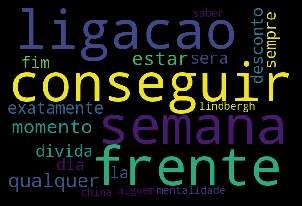

In [55]:
wordcloud = WordCloud(width=600, height=400).generate(most_common_string)

plt.figure(figsize=(4,4), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()